In [1]:
# Import all required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Import the dataset

data = pd.read_excel('Health_Care_Data_train.xlsx')

In [3]:
# Get the number of rows and number of columns of the dataset

data.shape

(1100, 38)

In [4]:
# obtain some statistics about the given data

data.describe()

,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,...,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
count,1100.000000,1093.000000,1094.000000,1089.000000,1094.000000,1097.000000,1083.000000,1089.000000,1093.000000,1090.000000,...,1085.000000,1088.000000,1088.000000,1089.000000,1092.000000,1091.000000,1086.000000,1090.000000,1086.000000,1091.000000
mean,0.911818,0.288198,4.469835,3.425161,3.705667,3.710119,3.287165,4.173554,4.535224,3.675229,...,3.787097,4.144301,3.860294,3.943985,2.808608,2.766269,3.000921,3.676147,3.731123,1.876260
std,0.283688,0.453131,0.776192,1.297676,1.178189,1.202119,1.256293,0.979664,0.655977,1.038749,...,0.951702,0.847283,1.076967,0.924336,1.233878,1.198393,1.237285,0.998014,1.116895,1.030852
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,4.000000,2.000000,3.000000,3.000000,2.000000,4.000000,4.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000
50%,1.000000,0.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000
75%,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,...,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,2.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# check the number of NA values present in each column of the dataset

data.isna().sum()

Group         0
Specialty     0
physician     0
verysat       7
q1            6
q2           11
q3            6
q5            3
q6           17
q7           11
q9            7
q10          10
q11          26
q12          18
q13          18
q14          11
q16           8
q17           8
q18           8
q19           8
q20          31
q27          13
q34           4
q35           7
q37           9
q38           9
q45          12
q46          13
q47          15
q48          12
q50          12
q51          11
q53           8
q54           9
q55          14
q56          10
q57          14
q58           9
dtype: int64

In [6]:
# Display maximum of 50 columns

pd.set_option('display.max_columns', 50)

In [7]:
# Replace the NA values in the dataset with the mean and then round the values

# data = data.fillna(data.mean())
# data = np.round(data)

In [8]:
# Replace the columns Specialty with a one-hot encoded version
# Group column is dropped

dummy = pd.get_dummies(data['Specialty'])
df = pd.concat([dummy, data], axis = 1)
df.drop(['Specialty', 'Group'], axis = 1, inplace=True)
# df.head()

In [9]:
# Replace nan values with the median value

from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
df.iloc[:,2:] = imp_median.fit_transform(df.iloc[:,2:])
df

# np.unique(df['q3'])

,Non_MD,Other,Primary_Care,Specialist,Surgical,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57,q58
0,0,1,0.0,0.0,0.0,1.0,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0,3.0
1,0,1,0.0,0.0,0.0,1.0,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0,2.0
2,0,1,0.0,0.0,0.0,1.0,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0,2.0
3,0,1,0.0,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
4,0,0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0.0,1.0,0.0,1.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0,2.0
1096,0,0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,2.0
1097,0,0,0.0,0.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,1.0
1098,0,0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0


In [10]:
# Define a function to plot the correlation matrix

def plotCorrelationMatrix(df, graphWidth):
    filename = 'People Analytics'
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

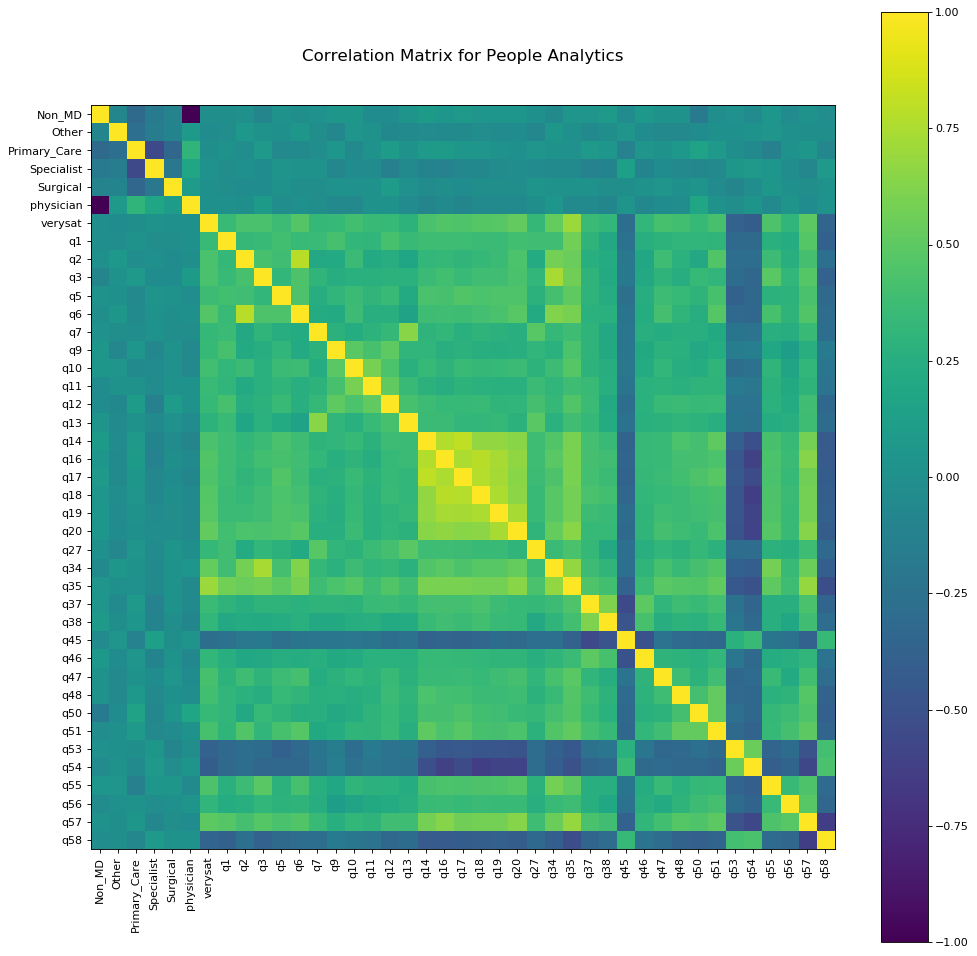

In [11]:
# Calling the above function with the required parameters

plotCorrelationMatrix(df, 15)

In [12]:
# Include all columns excepts 'q58' as the input

x=df.iloc[:, :-1]
x

,Non_MD,Other,Primary_Care,Specialist,Surgical,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57
0,0,1,0.0,0.0,0.0,1.0,0.0,5.0,2.0,2.0,4.0,1.0,5.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0
1,0,1,0.0,0.0,0.0,1.0,0.0,5.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,1.0,4.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0
2,0,1,0.0,0.0,0.0,1.0,0.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,5.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0
3,0,1,0.0,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0
4,0,0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,1.0,3.0,4.0,1.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0.0,1.0,0.0,1.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0
1096,0,0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0
1097,0,0,0.0,0.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0
1098,0,0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0


In [13]:
# Set column 'q58' as the output

y = df.q58
y

0       3.0
1       2.0
2       2.0
3       1.0
4       3.0
       ... 
1095    2.0
1096    2.0
1097    1.0
1098    2.0
1099    3.0
Name: q58, Length: 1100, dtype: float64

In [14]:
# split into training and test dataset in an 80:20 ratio

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [15]:
x_train.shape

(880, 40)

In [16]:
y_train.shape

(880,)

## K Nearest Neighbors

In [17]:
# Define the model and print the accuracies of training and testing data in case of K Nearest Neighbors

# KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'euclidean', metric_params = None, n_jobs = 1, n_neighbors = 13, p = 2, weights = 'uniform')

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(13).fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(accuracy_score(y_train, classifier.predict(x_train)))
print(accuracy_score(y_test, classifier.predict(x_test)))

0.6386363636363637
0.6136363636363636


In [18]:
# Recall is also known as Sensitivity

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.78      0.77        99
         2.0       0.49      0.62      0.55        63
         3.0       0.49      0.47      0.48        40
         4.0       0.00      0.00      0.00        11
         5.0       0.00      0.00      0.00         7

    accuracy                           0.61       220
   macro avg       0.35      0.37      0.36       220
weighted avg       0.57      0.61      0.59       220



/Users/vishaal811/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# AUC (Area under the curve)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.5536851683348498

In [20]:
# Weighted Kappa

from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.41196817710134903

In [21]:
# Predicted value of test set results

y_pred = classifier.predict(x_test)

In [22]:
# Making the Confusion Matrix

cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[77, 17,  5,  0,  0],
       [19, 39,  5,  0,  0],
       [ 4, 17, 19,  0,  0],
       [ 0,  5,  6,  0,  0],
       [ 1,  2,  4,  0,  0]])

## Multiclass Classification

In [23]:
# One vs Rest Classifier
# Accuracy without feature scaling

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(max_iter = 10000)).fit(x_train, y_train)
print(accuracy_score(y_train, clf.predict(x_train)))
print(accuracy_score(y_test, clf.predict(x_test)))

0.7022727272727273
0.5636363636363636


In [24]:
# Predicted value of test set results

y_pred2 = clf.predict(x_test)

In [25]:
# Making the Confusion Matrix

cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[93,  3,  3,  0,  0],
       [42,  9, 12,  0,  0],
       [ 5, 12, 22,  1,  0],
       [ 0,  1, 10,  0,  0],
       [ 3,  0,  4,  0,  0]])

In [26]:
# One vs One Classifier with 
# Accuracy without feature scaling

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
clf1 = OneVsOneClassifier(LinearSVC(random_state=100, max_iter = 100000)).fit(x_train, y_train)
print(accuracy_score(y_train, clf1.predict(x_train)))
print(accuracy_score(y_test, clf1.predict(x_test)))

0.6704545454545454
0.5863636363636363


In [27]:
# Predicted value of test set results

y_pred3 = clf1.predict(x_test)

In [28]:
# Making the Confusion Matrix

cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[82, 11,  3,  0,  3],
       [28, 30,  4,  1,  0],
       [ 1, 17, 15,  3,  4],
       [ 0,  1,  8,  2,  0],
       [ 2,  2,  3,  0,  0]])

## Logistic Regression

In [29]:
# import the logistic regression model

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 1, max_iter = 10000)
clf3 = logreg.fit(x_train, y_train)
print(accuracy_score(y_train, clf3.predict(x_train)))
print(accuracy_score(y_test, clf3.predict(x_test)))

0.6556818181818181
0.5954545454545455


## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf4 = gnb.fit(x_train, y_train)
y_pred = clf4.predict(x_test)
print(accuracy_score(y_train, clf4.predict(x_train)))
print(accuracy_score(y_test, clf4.predict(x_test)))

0.22386363636363638
0.19090909090909092


## Support Vector Machine

In [31]:
from sklearn import svm
svc = svm.SVC()
clf5 = svc.fit(x_train, y_train)
print(accuracy_score(y_train, clf5.predict(x_train)))
print(accuracy_score(y_test, clf5.predict(x_test)))

0.6772727272727272
0.6318181818181818


## Random Forest

0.6454545454545455


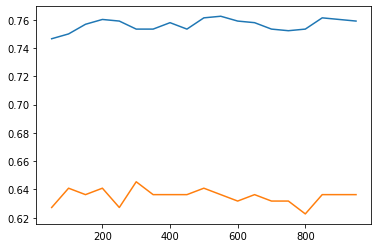

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

acc = []
acc_test = []
for i in range(50,1000,50):
    rf = RandomForestClassifier(i, max_leaf_nodes=32)
    rf.fit(x_train, y_train)
    acc.append(accuracy_score(y_train, rf.predict(x_train)))
    acc_test.append(accuracy_score(y_test, rf.predict(x_test)))
print(np.max(acc_test))
    
plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

In [33]:
y_pred = rf.predict(x_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.84      0.80        99
         2.0       0.53      0.57      0.55        63
         3.0       0.49      0.53      0.51        40
         4.0       0.00      0.00      0.00        11
         5.0       0.00      0.00      0.00         7

    accuracy                           0.64       220
   macro avg       0.36      0.39      0.37       220
weighted avg       0.58      0.64      0.61       220



/Users/vishaal811/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.4431260876443601

## Grid Search

In [36]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV

parameters = [{'n_neighbors': [5,10, 11, 12, 13, 14, 15, 16, 17, 18,19, 20], 'leaf_size': [30, 40, 50, 60, 100], 'p': [1,2]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [37]:
# Test accuracy after performing grid search

new_accuracy = grid_search.best_score_

In [38]:
# The hyperparameters on which we obtain the highest accuracy

grid_search.best_params_

{'leaf_size': 100, 'n_neighbors': 20, 'p': 1}

In [39]:
new_accuracy

0.6102272727272727

## Removing Some Features

In [40]:
# Dropping the features which have the maximum NaN (missing) values
# Also we can remove features that are highly correlated with each other as they may be redundant
# Keep the feature which is more correlated with the output variable 'q58'

xr=x.drop(['q6', 'q11', 'q12', 'q13', 'q20'], axis=1)
xr

,Non_MD,Other,Primary_Care,Specialist,Surgical,physician,verysat,q1,q2,q3,q5,q7,q9,q10,q14,q16,q17,q18,q19,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57
0,0,1,0.0,0.0,0.0,1.0,0.0,5.0,2.0,2.0,4.0,5.0,5.0,4.0,4.0,3.0,2.0,2.0,2.0,5.0,1.0,3.0,4.0,4.0,1.0,5.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,3.0,3.0
1,0,1,0.0,0.0,0.0,1.0,0.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,2.0,2.0,5.0,1.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,5.0,4.0,1.0,3.0,3.0
2,0,1,0.0,0.0,0.0,1.0,0.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,3.0,3.0,5.0,3.0
3,0,1,0.0,0.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0
4,0,0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,4.0,1.0,5.0,3.0,3.0,5.0,5.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0.0,1.0,0.0,1.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,5.0,5.0,5.0
1096,0,0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,2.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0
1097,0,0,0.0,0.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0
1098,0,0,0.0,0.0,1.0,1.0,0.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,2.0,4.0,5.0,5.0,3.0,3.0,2.0,3.0,3.0,3.0,4.0


In [41]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(xr,y,test_size=0.2)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(13).fit(x_train1, y_train1)
print(accuracy_score(y_train1, classifier.predict(x_train1)))
print(accuracy_score(y_test1, classifier.predict(x_test1)))

0.6568181818181819
0.6272727272727273


In [43]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(max_iter = 10000)).fit(x_train1, y_train1)
print(accuracy_score(y_train1, clf.predict(x_train1)))
print(accuracy_score(y_test1, clf.predict(x_test1)))

0.7068181818181818
0.5727272727272728


In [44]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
clf1 = OneVsOneClassifier(LinearSVC(random_state=100, max_iter = 100000)).fit(x_train1, y_train1)
print(accuracy_score(y_train1, clf1.predict(x_train1)))
print(accuracy_score(y_test1, clf1.predict(x_test1)))

0.6659090909090909
0.5818181818181818


In [45]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 1, max_iter = 10000)
clf3 = logreg.fit(x_train1, y_train1)
print(accuracy_score(y_train1, clf3.predict(x_train1)))
print(accuracy_score(y_test1, clf3.predict(x_test1)))

0.6568181818181819
0.5954545454545455


In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf4 = gnb.fit(x_train1, y_train1)
y_pred = clf4.predict(x_test1)
print(accuracy_score(y_train1, clf4.predict(x_train1)))
print(accuracy_score(y_test1, clf4.predict(x_test1)))

0.4125
0.36818181818181817


In [47]:
from sklearn import svm
svc = svm.SVC()
clf5 = svc.fit(x_train1, y_train1)
print(accuracy_score(y_train1, clf5.predict(x_train1)))
print(accuracy_score(y_test1, clf5.predict(x_test1)))

0.6875
0.6136363636363636


0.5954545454545455


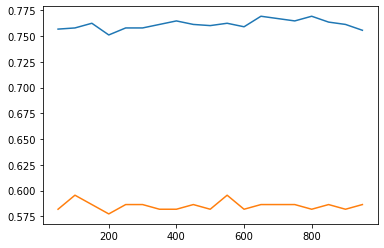

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

acc = []
acc_test = []
for i in range(50,1000,50):
    rf = RandomForestClassifier(i, max_leaf_nodes=32)
    rf.fit(x_train1, y_train1)
    acc.append(accuracy_score(y_train1, rf.predict(x_train1)))
    acc_test.append(accuracy_score(y_test1, rf.predict(x_test1)))
print(np.max(acc_test))
    
plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

## Feature Scaling

In [49]:
# Feature Scaling

sc_x = StandardScaler()
x_scaled = sc_x.fit_transform(x)
np.round(x_scaled)

x_train2 = sc_x.fit_transform(x_train)
x_test2 = sc_x.transform(x_test)
np.round(x_train2)
np.round(x_test2)

array([[-0., -0.,  1., ..., -2., -2., -1.],
       [-0., -0.,  1., ...,  2.,  1.,  1.],
       [-0., -0., -1., ..., -0., -1., -1.],
       ...,
       [-0., -0.,  1., ...,  2.,  0.,  1.],
       [-0., -0.,  1., ..., -0., -2., -2.],
       [-0., -0.,  1., ..., -0.,  0., -2.]])

In [50]:
x_scaled = pd.DataFrame(x_scaled)
x_scaled.columns = x.columns
x_scaled = np.round(x_scaled)

x_scaled

,Non_MD,Other,Primary_Care,Specialist,Surgical,physician,verysat,q1,q2,q3,q5,q6,q7,q9,q10,q11,q12,q13,q14,q16,q17,q18,q19,q20,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57
0,-0.0,4.0,-1.0,-1.0,-0.0,0.0,-1.0,1.0,-1.0,-1.0,0.0,-2.0,1.0,1.0,0.0,1.0,1.0,-2.0,0.0,-0.0,-1.0,-1.0,-1.0,-1.0,1.0,-2.0,-1.0,-0.0,0.0,-1.0,1.0,-2.0,-3.0,-1.0,-1.0,2.0,2.0,2.0,-1.0,-1.0
1,-0.0,4.0,-1.0,-1.0,-0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,-0.0,1.0,0.0,0.0,1.0,-4.0,0.0,-1.0,-1.0,1.0,-2.0,-0.0,-0.0,0.0,0.0,-0.0,-1.0,-0.0,0.0,0.0,-0.0,-1.0,-1.0,2.0,1.0,-2.0,-1.0,-1.0
2,-0.0,4.0,-1.0,-1.0,-0.0,0.0,-1.0,1.0,1.0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,1.0,-2.0,1.0,0.0,0.0,1.0,-0.0,-0.0,1.0,0.0,0.0,-1.0,-1.0,-0.0,-2.0,0.0,-0.0,-2.0,-1.0,-1.0,0.0,-0.0,1.0,-1.0
3,-0.0,4.0,-1.0,-1.0,-0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.0,1.0,1.0
4,-0.0,-0.0,1.0,-1.0,-0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,-2.0,-1.0,-1.0,-3.0,0.0,-1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-3.0,-0.0,-1.0,-1.0,0.0,-3.0,1.0,-1.0,-1.0,2.0,2.0,-2.0,-1.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.0,-0.0,-1.0,2.0,-0.0,0.0,2.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,-0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.0,1.0,1.0
1096,-0.0,-0.0,-1.0,-1.0,3.0,0.0,-1.0,1.0,0.0,-1.0,0.0,1.0,-0.0,-1.0,-1.0,-1.0,-0.0,-2.0,-1.0,-0.0,0.0,-0.0,-0.0,-0.0,-2.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-0.0,0.0,0.0,0.0,-1.0,-0.0,-1.0,0.0
1097,-0.0,-0.0,-1.0,-1.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.0,1.0,1.0
1098,-0.0,-0.0,-1.0,-1.0,3.0,0.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,-0.0,-1.0,0.0


In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(14).fit(x_train2, y_train)
print(accuracy_score(y_train, classifier.predict(x_train2)))
print(accuracy_score(y_test, classifier.predict(x_test2)))

0.6352272727272728
0.5590909090909091


In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(max_iter = 10000)).fit(x_train2, y_train)
print(accuracy_score(y_train, clf.predict(x_train2)))
print(accuracy_score(y_test, clf.predict(x_test2)))

0.8363636363636363
0.6090909090909091


In [53]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
clf1 = OneVsOneClassifier(LinearSVC(random_state=100, max_iter = 100000)).fit(x_train2, y_train)
print(accuracy_score(y_train, clf1.predict(x_train2)))
print(accuracy_score(y_test, clf1.predict(x_test2)))

0.6681818181818182
0.5863636363636363


In [54]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 1, max_iter = 10000)
clf3 = logreg.fit(x_train2, y_train)
print(accuracy_score(y_train, clf3.predict(x_train2)))
print(accuracy_score(y_test, clf3.predict(x_test2)))

0.6534090909090909
0.5909090909090909


In [55]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf4 = gnb.fit(x_train2, y_train)
y_pred = clf4.predict(x_test2)
print(accuracy_score(y_train, clf4.predict(x_train2)))
print(accuracy_score(y_test, clf4.predict(x_test2)))

0.1215909090909091
0.15


In [56]:
from sklearn import svm
svc = svm.SVC()
clf5 = svc.fit(x_train2, y_train)
print(accuracy_score(y_train, clf5.predict(x_train2)))
print(accuracy_score(y_test, clf5.predict(x_test2)))

0.7795454545454545
0.6227272727272727


0.6409090909090909


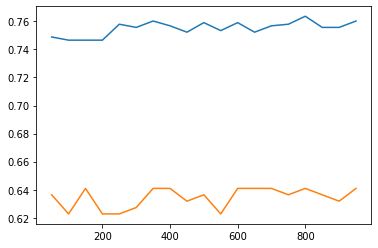

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

acc = []
acc_test = []
for i in range(50,1000,50):
    rf = RandomForestClassifier(i, max_leaf_nodes=32)
    rf.fit(x_train2, y_train)
    acc.append(accuracy_score(y_train, rf.predict(x_train2)))
    acc_test.append(accuracy_score(y_test, rf.predict(x_test2)))
print(np.max(acc_test))
    
plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

In [58]:
# data.iloc[1,3]

In [59]:
# np.unique(data['q58'])

In [60]:
# math.sqrt(len(y_test))

## Removing some features

In [61]:
# Dropping the features which have the maximum NaN (missing) values
# Also we can remove features that are highly correlated with each other as they may be redundant
# Keep the feature which is more correlated with the output variable 'q58'

xr2=x_scaled.drop(['q6', 'q11', 'q12', 'q13', 'q20'], axis=1)
xr2

,Non_MD,Other,Primary_Care,Specialist,Surgical,physician,verysat,q1,q2,q3,q5,q7,q9,q10,q14,q16,q17,q18,q19,q27,q34,q35,q37,q38,q45,q46,q47,q48,q50,q51,q53,q54,q55,q56,q57
0,-0.0,4.0,-1.0,-1.0,-0.0,0.0,-1.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0,-0.0,-1.0,-1.0,-1.0,1.0,-2.0,-1.0,-0.0,0.0,-1.0,1.0,-2.0,-3.0,-1.0,-1.0,2.0,2.0,2.0,-1.0,-1.0
1,-0.0,4.0,-1.0,-1.0,-0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-0.0,1.0,0.0,0.0,-1.0,-1.0,1.0,-2.0,-0.0,0.0,0.0,-0.0,-1.0,-0.0,0.0,0.0,-0.0,-1.0,-1.0,2.0,1.0,-2.0,-1.0,-1.0
2,-0.0,4.0,-1.0,-1.0,-0.0,0.0,-1.0,1.0,1.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.0,1.0,0.0,0.0,-1.0,-1.0,-0.0,-2.0,0.0,-0.0,-2.0,-1.0,-1.0,0.0,-0.0,1.0,-1.0
3,-0.0,4.0,-1.0,-1.0,-0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.0,1.0,1.0
4,-0.0,-0.0,1.0,-1.0,-0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-1.0,-3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-3.0,-0.0,-1.0,-1.0,0.0,-3.0,1.0,-1.0,-1.0,2.0,2.0,-2.0,-1.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.0,-0.0,-1.0,2.0,-0.0,0.0,2.0,-1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.0,1.0,1.0
1096,-0.0,-0.0,-1.0,-1.0,3.0,0.0,-1.0,1.0,0.0,-1.0,0.0,-0.0,-1.0,-1.0,-1.0,-0.0,0.0,-0.0,-0.0,-2.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-0.0,0.0,0.0,0.0,-1.0,-0.0,-1.0,0.0
1097,-0.0,-0.0,-1.0,-1.0,3.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,2.0,1.0,1.0
1098,-0.0,-0.0,-1.0,-1.0,3.0,0.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,-0.0,-1.0,0.0


In [62]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(xr2,y,test_size=0.2)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(14).fit(x_train3, y_train3)
print(accuracy_score(y_train3, classifier.predict(x_train3)))
print(accuracy_score(y_test3, classifier.predict(x_test3)))

0.6136363636363636
0.6227272727272727


In [64]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC(max_iter = 10000)).fit(x_train3, y_train3)
print(accuracy_score(y_train3, clf.predict(x_train3)))
print(accuracy_score(y_test3, clf.predict(x_test3)))

0.8375
0.6590909090909091


In [65]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

clf1 = OneVsOneClassifier(LinearSVC(random_state=100, max_iter = 100000)).fit(x_train3, y_train3)
print(accuracy_score(y_train3, clf1.predict(x_train3)))
print(accuracy_score(y_test3, clf1.predict(x_test3)))

0.6545454545454545
0.6227272727272727


In [66]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state = 1, max_iter = 10000)
clf3 = logreg.fit(x_train3, y_train3)
print(accuracy_score(y_train3, clf3.predict(x_train3)))
print(accuracy_score(y_test3, clf3.predict(x_test3)))

0.65
0.6318181818181818


In [67]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
clf4 = gnb.fit(x_train3, y_train3)
y_pred = clf4.predict(x_test3)
print(accuracy_score(y_train3, clf4.predict(x_train3)))
print(accuracy_score(y_test3, clf4.predict(x_test3)))

0.3931818181818182
0.39545454545454545


In [68]:
from sklearn import svm
svc = svm.SVC()
clf5 = svc.fit(x_train3, y_train3)
print(accuracy_score(y_train3, clf5.predict(x_train3)))
print(accuracy_score(y_test3, clf5.predict(x_test3)))

0.7545454545454545
0.6772727272727272


0.6772727272727272


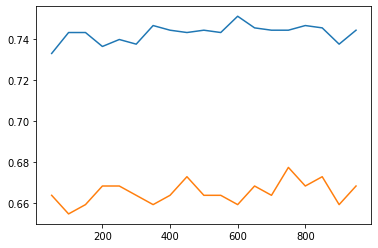

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

acc = []
acc_test = []
for i in range(50,1000,50):
    rf = RandomForestClassifier(i, max_leaf_nodes=32)
    rf.fit(x_train3, y_train3)
    acc.append(accuracy_score(y_train3, rf.predict(x_train3)))
    acc_test.append(accuracy_score(y_test3, rf.predict(x_test3)))
print(np.max(acc_test))
    
plt.figure()
plt.plot(range(50,1000,50), acc)
plt.plot(range(50,1000,50), acc_test)
plt.show()

## Voting Classifiers

In [70]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import model_selection

In [71]:
clf6 = KNeighborsClassifier(14)
clf7 = RandomForestClassifier(random_state=1, n_estimators=300, max_leaf_nodes=32)
clf8 = svm.SVC()

labels = ['K Nearest Neighbors', 'Random Forest', 'Support Vector Machines']

for clf, label in zip([clf6, clf7, clf8], labels):

    scores = model_selection.cross_val_score(clf, x_train, y_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.59 (+/- 0.03) [K Nearest Neighbors]
Accuracy: 0.62 (+/- 0.01) [Random Forest]
Accuracy: 0.62 (+/- 0.02) [Support Vector Machines]


In [72]:
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf6),
                                                 (labels[1], clf7),
                                                 (labels[2], clf8)],
                                   voting = 'hard')

In [73]:
labels_new = ['K Nearest Neighbors', 'Random Forest', 'SVM',
              'Voting_Classifier_Hard']

for (clf, label) in zip([clf6, clf7, clf8, voting_clf_hard], labels_new):
    scores = model_selection.cross_val_score(clf, x_train, y_train, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.59 (+/- 0.03) [K Nearest Neighbors]
Accuracy: 0.62 (+/- 0.01) [Random Forest]
Accuracy: 0.62 (+/- 0.02) [SVM]
Accuracy: 0.62 (+/- 0.02) [Voting_Classifier_Hard]


In [74]:
# After dropping some features

clf6 = KNeighborsClassifier(14)
clf7 = RandomForestClassifier(random_state=1, n_estimators=300, max_leaf_nodes=32)
clf8 = svm.SVC()

labels = ['K Nearest Neighbors', 'Random Forest', 'Support Vector Machines']

for clf, label in zip([clf6, clf7, clf8], labels):

    scores = model_selection.cross_val_score(clf, x_train1, y_train1, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf6),
                                                 (labels[1], clf7),
                                                 (labels[2], clf8)],
                                   voting = 'hard')

labels_new = ['K Nearest Neighbors', 'Random Forest', 'SVM',
              'Voting_Classifier_Hard']

for (clf, label) in zip([clf6, clf7, clf8, voting_clf_hard], labels_new):
    scores = model_selection.cross_val_score(clf, x_train1, y_train1, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.59 (+/- 0.03) [K Nearest Neighbors]
Accuracy: 0.63 (+/- 0.03) [Random Forest]
Accuracy: 0.63 (+/- 0.04) [Support Vector Machines]
Accuracy: 0.59 (+/- 0.03) [K Nearest Neighbors]
Accuracy: 0.63 (+/- 0.03) [Random Forest]
Accuracy: 0.63 (+/- 0.04) [SVM]
Accuracy: 0.63 (+/- 0.04) [Voting_Classifier_Hard]


In [ ]:
# After feature scaling

clf6 = KNeighborsClassifier(14)
clf7 = RandomForestClassifier(random_state=1, n_estimators=300, max_leaf_nodes=32)
clf8 = svm.SVC()

labels = ['K Nearest Neighbors', 'Random Forest', 'Support Vector Machines']

for clf, label in zip([clf6, clf7, clf8], labels):

    scores = model_selection.cross_val_score(clf, x_train2, y_train, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf6),
                                                 (labels[1], clf7),
                                                 (labels[2], clf8)],
                                   voting = 'hard')

labels_new = ['K Nearest Neighbors', 'Random Forest', 'SVM',
              'Voting_Classifier_Hard']

for (clf, label) in zip([clf6, clf7, clf8, voting_clf_hard], labels_new):
    scores = model_selection.cross_val_score(clf, x_train2, y_train, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.59 (+/- 0.03) [K Nearest Neighbors]


In [ ]:
# After feature scaling and removing some features

clf6 = KNeighborsClassifier(14)
clf7 = RandomForestClassifier(random_state=1, n_estimators=300, max_leaf_nodes=32)
clf8 = svm.SVC()

labels = ['K Nearest Neighbors', 'Random Forest', 'Support Vector Machines']

for clf, label in zip([clf6, clf7, clf8], labels):

    scores = model_selection.cross_val_score(clf, x_train3, y_train3, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))
    
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf6),
                                                 (labels[1], clf7),
                                                 (labels[2], clf8)],
                                   voting = 'hard')

labels_new = ['K Nearest Neighbors', 'Random Forest', 'SVM',
              'Voting_Classifier_Hard']

for (clf, label) in zip([clf6, clf7, clf8, voting_clf_hard], labels_new):
    scores = model_selection.cross_val_score(clf, x_train3, y_train3, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

## Feature Importance

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import make_pipeline

# pip_rf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=500, class_weight="balanced", random_state=123))
    
# hyperparam_grid = {
#     'randomforestclassifier__n_estimators': [10, 50, 100, 500],
#     'randomforestclassifier__max_features': ["sqrt", "log2", 0.4, 0.5],
#     'randomforestclassifier__min_samples_leaf': [1, 3, 5],
#     'randomforestclassifier__criterion': ["gini", "entropy"]}
    
# gs_rf = GridSearchCV(pip_rf,
#                     hyperparam_grid,
#                     scoring='f1',
#                     cv=10,
#                     n_jobs=-1)
# gs_rf.fit(x_train, y_train)

# features = gs_rf.best_estimator_.steps[1][1].feature_importances_
# index = df.columns[df.columns != 'q58']
# imp_features = pd.Series(data=features[:9], index=index)
# imp_features.sort_values(ascending=False, inplace=True)
# imp_features.plot(kind='bar')
# plt.show()